In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [62]:
data_dir = r'E:\datasets\MADE\3_graduation\parthplc\archive\data\\'

train_path = data_dir + 'train.jsonl'
dev_path = data_dir + 'dev.jsonl'

train_data = pd.read_json(train_path, lines=True)
test_data = pd.read_json(dev_path, lines=True)

In [63]:
test_data = test_data.sort_values('id')
test_data

,id,img,label,text
494,1268,img/01268.png,0,father and daughter bonding time is the best l...
159,1456,img/01456.png,1,they see them rollin..... they hating..
332,1726,img/01726.png,1,a real man loads the dishwasher every night
220,1742,img/01742.png,0,in just one hour from now i'll only have 4 hou...
217,1765,img/01765.png,1,"after a girl dies, what organ in her body stay..."
...,...,...,...,...
457,98235,img/98235.png,0,fashion forward !
412,98543,img/98543.png,1,upper downer
271,98547,img/98547.png,0,waves mexican flag doesn't want to live in mexico
164,98701,img/98701.png,1,oh no i can't steal anymore


In [64]:
predict = pd.read_csv(r'report.csv')
predict = predict.sort_values('id')
predict

,id,proba,label
6,1268,0.003955,0
460,1456,0.918009,1
321,1726,0.298493,0
369,1742,0.007295,0
452,1765,0.127732,0
...,...,...,...
198,98235,0.037743,0
441,98543,0.867744,1
350,98547,0.289339,0
45,98701,0.264626,0


Accuracy: 0.624
ROC AUC: 0.7174079999999999


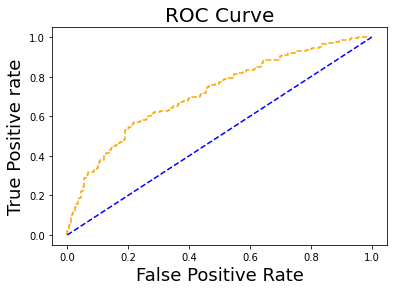

In [65]:
prediction = predict['label'].values
predict_proba = predict['proba'].values
labels = test_data['label'].values

acc_score = accuracy_score(labels, prediction)

fpr, tpr, thresh = roc_curve(labels, predict_proba, pos_label=1)

random_probs = [0 for i in range(len(labels))]
p_fpr, p_tpr, _ = roc_curve(labels, random_probs, pos_label=1)
auc_score = roc_auc_score(labels, predict_proba)
print('Accuracy: ', acc_score, '\n', 'ROC AUC: ', auc_score, sep='')

plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive rate',fontsize=18)

plt.show();